In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://quotes.toscrape.com"
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

quotes = soup.find_all("span", class_="text")
authors = soup.find_all("small", class_="author")

data = []

for q, a in zip(quotes, authors):
    data.append({
        "Review_Text": q.text,
        "Author": a.text
    })

df = pd.DataFrame(data)

print(df.head())

df.to_csv("reviews_dataset.csv", index=False)

                                         Review_Text           Author
0  “The world as we have created it is a process ...  Albert Einstein
1  “It is our choices, Harry, that show what we t...     J.K. Rowling
2  “There are only two ways to live your life. On...  Albert Einstein
3  “The person, be it gentleman or lady, who has ...      Jane Austen
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe


In [2]:
import pandas as pd

df = pd.read_csv("reviews_dataset.csv")
df.head()

,Review_Text,Author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  10 non-null     object
 1   Author       10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [4]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [5]:
len(df)

10

In [6]:
df["length"] = df["Review_Text"].apply(len)
df.head()

,Review_Text,Author,length
0,“The world as we have created it is a process ...,Albert Einstein,115
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,85
2,“There are only two ways to live your life. On...,Albert Einstein,131
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,104
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,111


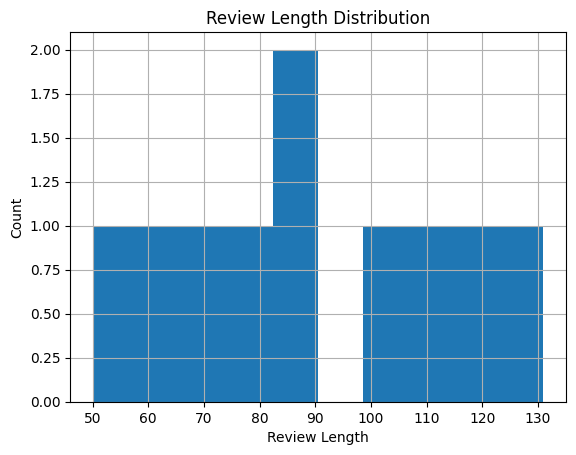

In [7]:
import matplotlib.pyplot as plt

df["length"].hist()
plt.title("Review Length Distribution")
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.show()

- Most reviews are of medium length, indicating meaningful user feedback.
- Very short reviews may represent low-quality or spam-like content.
- The dataset is suitable for further analysis such as sentiment analysis.